# <p style='text-align: center;'>GOPH 419 Computational Methods for Geophysicists : Lab 2 </p>

## <p style='text-align: center;'>Cole Narfason & Fazlie Latib</p>

## Abstract

<p style='text-align: justify;'>The aim of this lab is to perform root finding using an open method, the Modified Secant Method to analyze the dispersion of Love waves in a 2-layer system in terms of its frequency, velocity and wavelength. The modified secant method is beneficial because it only requires one initial guess and a reasonable step size. A root_secant_modified function was created and will accept three variable inputs (x0, dx and f) and give out three outputs (xr, iter and eps_a). The function will stop iterating once the approximate relative error fell below the specified stopping criteria of $ 0.5×10^{-10} $. In Equation 1, the Love wave dispersion equation is framed as a root finding problem f(ζ)=0 where freq, ρ1, ρ2, β1, β2 and H are all known. The maximum ζ value is calculated to be ~1.693999. The range of frequency chosen in this lab is between 0.1 and 0.8. Using the graphical method where equation 1 is plotted at each frequency, the number of roots or solutions at each frequency can be observed. For frequency of 0.1 to 0.3, there is one solution for ζ. For frequency of 0.4 to 0.6, there are two solutions for ζ. For frequency of 0.7 to 0.8, there are three solutions for ζ. The differenct number of solutions are called different "modes". The initial guess, x0 for each mode was approximated from the graphs where mode 1 has x0 = 0.2, mode 2 has x0 = 0.8 and mode 3 has x0 = 1.2. Using the root_secant_modified function, ζ can be approximated close to the real value. The Love wave velocity and wavelength can then be calculated using Equation 2 and 3 respectively after ζ values are found. The graphs of ζ, Love wave velocity and wavelength over frequency are plotted. Since the maximum number of modes for the frequency range chosen is 3, 3 curves is plotted on each graph where each curve represents each mode. Based on the trend shown in the graphs, we can conclude that the Love waves will disperse slower with a smaller wavelength as frequency increases. </p>

## Background and Theory

### Theory of Surface Wave Dispersion

In [1]:
# show picture of Love Wave
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://counciloflove.com/wp-content/uploads/2017/08/heartwave-730x400.jpg")

The dispersion equation for Love waves in a two-layer system is seen below in **Equation 1**

#### Equation 1: The Dispersion Equation for Love Waves in a 2-layer system (a single surface layer overlying an infinite half space layer)

$ \frac{\rho_1}{\rho_2} \frac{\sqrt{H^2(\beta_1^{-2} - \beta_2^{-2}) - \zeta^{2} }}{\zeta} - tan[(2\pi f)\zeta] = 0 $


where f is frequency (in Hz), ρi is the density of layer i, βi is the shear wave velocity of layer i (in m/s), i = 1 and 2 correspond to the surface layer and the baselayer, respectively, H is the thickness of the surface layer (in m) and ζ is shown in **Equation 2** 

#### Equation 2:

$ \zeta = H \sqrt{\beta_1^{-2} - c_L^{-2}} $

where cL is the Love wave velocity (in m/s). For H in m and velocities in m/s, ζ has units of s. For a given frequency and a given set of physical parameters ρ1, ρ2, β1, β2 and H defining the material properties and geometry of the system, one can determine the value(s) of ζ satisfying **Equation 1** and the corresponding Love wave velocity using **Equation 2**.

Note that for a given frequency f, there may be multiple solutions for ζ where the different solution are called "**modes**". These modes correspond to Love waves of different wavelength λL propagating at different velocities cL, which is illustrated in **Equation 3** below:

#### Equation 3:

$ \lambda_L = \frac{c_L}{f} $

For each “mode” there will be a curve of cL vs. f and for each point on the curve one can also determine the wavelength λL

## Modified Secant Root Finding Method

Finding roots to equations is useful and in our particular case the roots that satisfy one geophysical equation can be inputted into another equation to calculate for variables of interest. One such root finding method is called the **Modified Secant Method**. The modified secant method is considered an open method which means that initial guess(es) do not need to bracket the root - as compared to bracketing methods (hence the name).  

The most common open root finding method is the called the **Newton-Raphson Method** but this only works where the derivitive of a function f'(x) is available in closed form as seen below:

$ x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)} $

Sometimes this form is not available or f'(xi) is hard to derive so a truncated taylor series can be used to compute an approximate value for f'(xi) 

$ f'(x_{i-1}) \approx f(x_i) + f'(x_i)(x_{i-1}-x_i)  $

$ \Rightarrow \frac{f'(x_{i-1}) - f(x_i)}{x_{i-1}-x_i} $

This kind of approximation for the derivitive is called a "**backward divided difference**". Substitution of the backward divided difference formula into the Newton-Raphson formula gives the Secant formula.

$ x_{i+1} = x_i - f(x_i)\frac{x_{i-1}-x_i}{f'(x_{i-1}) - f(x_i)} $

This means that the Secant method **requires two initial guesses** $x_0$ and $ x_i $ 

A modified form introduces a step size $ \Delta x = x_{i-1} - x_i $ to obtain the **Modified Secant Method Formula** in **Equation 4**:

#### Equation 4:

$ x_{i+1} = x_i - \frac{f(x_i)\Delta x}{f(x_i+\Delta x) - f(x_i)} $

This modification of the secant method therefore only requires one initial guess $ x_0 $ as with the N-R method !

The main advantage of the modified secant method is it is generally faster than bracketing methods. It also does not require the use of the derivative of a given function, which is required in Newton-Raphson method. Another advantage is it requires only one function evaluation per iteration, as compared with Newton-Raphson method which requires two. One disadvantage of the modified secant method is the method can diverge in some special cases. 

# Methods/Algorithm and Discussion of Results

## Importing libraries

Import Necessary libraries Numpy and Matplotlib

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Setting function

Set up the function using the love wave dispersion formula seen in Equation 1 from theory section where z is ζ:

In [3]:
f = lambda z: (p1 / (p2 * z)) * np.sqrt((H ** 2) * (b1 ** -2 - b2 ** -2) - z ** 2) - np.tan(2 * np.pi * freq * z) 

## Setting variables

Initialize variables according to lab handout:

In [4]:
p1 = 1800 # density of layer 1, ρ1 (kg/m^3)
p2 = 2500 # density of layer 2, ρ2 (kg/m^3)
b1 = 1900 # shear wave velocity of layer 1, β1 (m/s)
b2 = 3200 # shear wave velocity of layer 2, β2 (m/s)
H = 4000 # thickness of the surface layer (m)

## Calculating maximum ζ

Calculate the maximum possible value of ζ that can be inserted in Equation 1 using the equation below so that the values under the square root in Equation 1 would not be negative.

$ \zeta \leqslant \sqrt{H^2(\beta_1^{-2} - \beta_2^{-2})} $


In [5]:
max_zeta = np.sqrt((H ** 2) * (b1 ** -2 - b2 ** -2))
print(max_zeta)

1.6939991038925966


## Approximating ζ using graphical methods

Usually the modified secant method might use the python function "**ginput**" to choose the original guess values for the algorithm. In this lab it was decided that plotting the function first and graphically seeing where roots to the function might be for different frequencies - then choosing the initial guesses was a better approach! It should be noted that **an initial guess must not be chosen on one of the asymptotes as this will cause the function to fail and this is a significant non-trivial component of the algorithm scripted.**

8 plots using 8 different frequencies from 0.1 to 0.8 were used to approximate where the roots were located for these initial guesses:

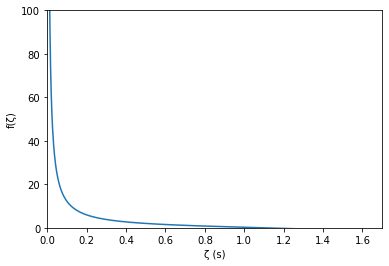

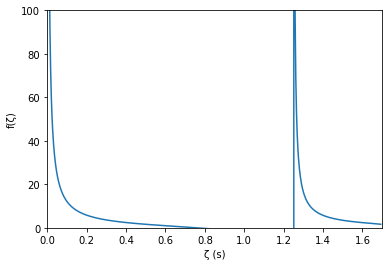

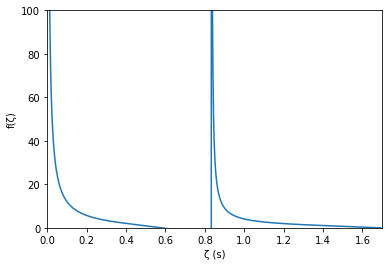

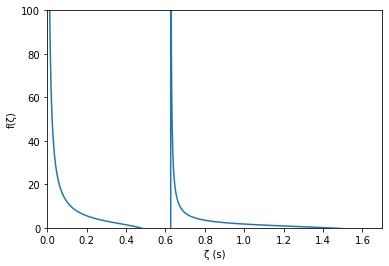

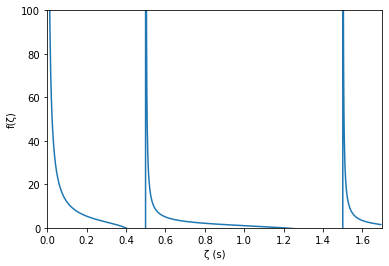

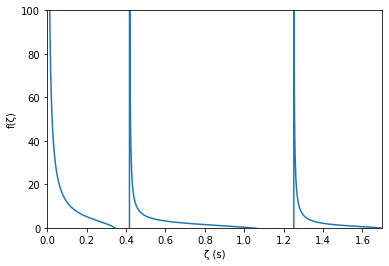

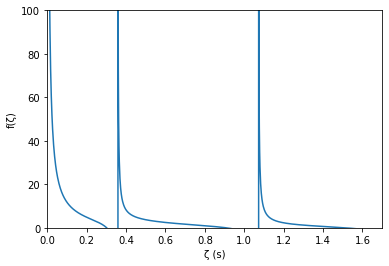

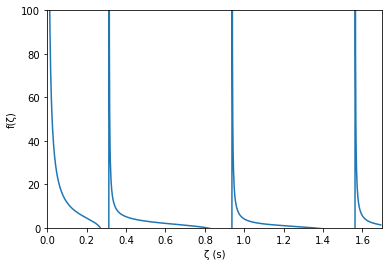

In [6]:
range_freq = np.linspace(0.1, 0.8, 8) # set the frequency range

z = np.linspace(0.01, 1.693, 1000) # set the ζ range

# begin loop
for freq in range_freq:
    plt.figure()
    plt.plot(z, f(z)) # plot f(ζ) over ζ at each frequency
    plt.xlabel('ζ (s)') # set x-axis label
    plt.ylabel('f(ζ)') # set y-axis label
    plt.ylim([0, 100]); # set x-axis limits
    plt.xlim([0, 1.7]); # set y-axis limits


From looking at these plots, it appears that for a given frequency value of f, there can be multiple solutions for ζ. This was discussed in the theory section of the lab and these multiple solutions are referred to as **modes**. For a frequency value of 0.1 to 0.3, there appears to be only 1 mode. For a frequency value of 0.4 to 0.6, there appears to be 2 modes. And lastly for a frequency value of 0.7 to 0.8, there appears to be 3 modes. From these observations, it can be inferred that **there are different amounts of modes at different frequencies and as the frequency value increases, so does the number of modes!**

## Defining modified secant function

Let us define the **root_secant_modified function** that takes three inputs which are the initial guess **x0**, the step size **dx** and a function **f** and gives three outputs which are the final root value **xr**, the number of iterations **iter**, and the final approximate relative error **eps_a**. This function also has an acceptable error (stopping criteria) value for when the approximate relative error is smaller than the stopping criteria, will allow the function to stop iterating and guessing roots. This is a significant component of the algorithm because this function would utilize the modified secant method to approximate and find the roots of any given equation or function by choosing an appropriate initial guess and reasonable step size.

In [7]:
def root_secant_modified(x0,dx,f):
#
# This function finds the root of a given function, f using the modified secant method.
#
# INPUTS:
# x0 is the initial guess
# dx is the step size
# f is the given function
#
# OUTPUT:
# xr is the approximate final value of the root
# iter is number of iterations
# eps_a is the final approximate relative error 
#

    es = 0.5e-10 # define stopping criterion
    
    eps_a = 100 # define initial approximate relative error
    
    xr_prev = 0 
    
    iter = 0 # define initial iteration number
    
    # begin loop
    while eps_a > es:
        
        iter = iter + 1 # count number of iterations
        
        xr = x0 - (f(x0) * dx) / (f(x0 + dx) - f(x0)) # estimate the root value
        
        eps_a = abs((xr - xr_prev) / xr) # calculate approximate relative error
        
        xr_prev = xr # store value of approximate root for next iteration
        
        x0 = xr # set the value of approximate root as next initial guess
        
    return xr, iter, eps_a # return approximate root, number of iterations and approximate relative error

## Testing function

Lets test the function with a frequency of 0.1, a step size of 0.01 and an initial guess of 0.2. From the plot of the 0.1 frequency value, the root appears to be located at around 1.1 .

In [8]:
freq = 0.1 # set the frequency value
initial_guess = 0.2 # set the initial guess
dx = 0.01 # set the step size

root_secant_modified(initial_guess,dx,f) # call function

(1.10669811460418, 8, 2.3273893604233617e-13)

It appears to have worked! The function outputted a ζ value close to 1.1 after 8 iterations with an approximate error that has magnitude of 10 to the power of -13 which is smaller than the specified stopping criterion.

## Verifying ζ values

Now lets verify that the function computed at our ζ value we computed close to 1.1 within a given error range produces a root value. Note that the root value should be extremely close to 0 if computed correctly as roots are found when the function is equal or very close to 0. The first, second, and third mode values should appear to be on the roots in the below plots.

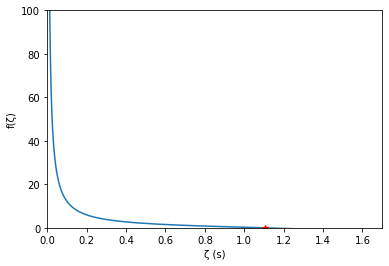

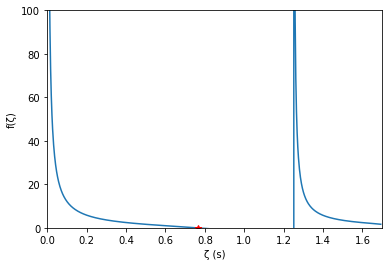

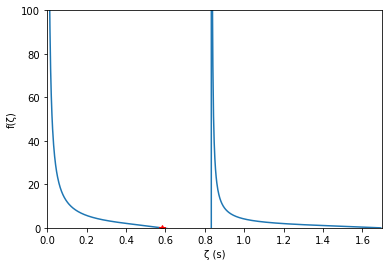

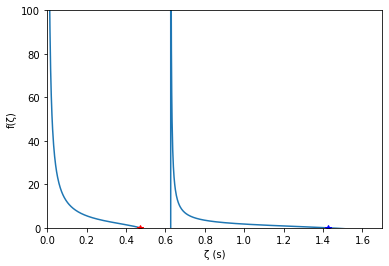

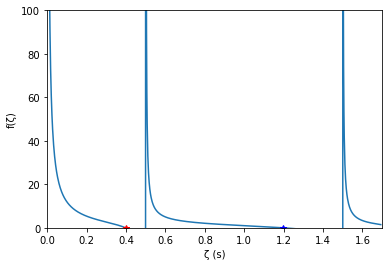

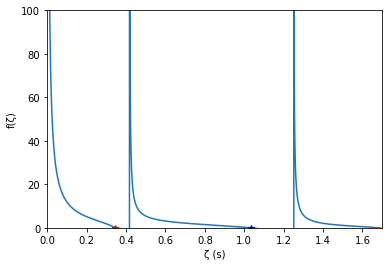

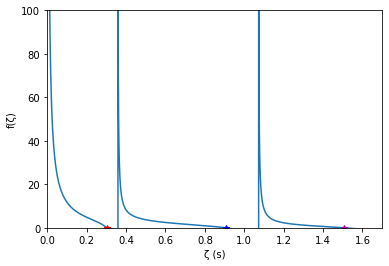

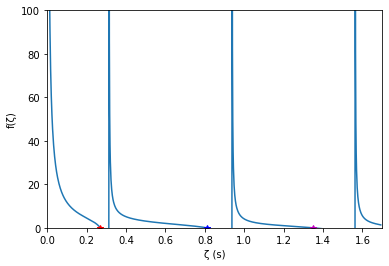

In [9]:
range_freq = np.linspace(0.1, 0.8, 8) # set the frequency range

z = np.linspace(0.01, 1.693, 1000) # set the ζ range

# begin loop
for freq in range_freq:
    plt.figure()
    plt.plot(z, f(z)) # plot f(ζ) over ζ at each frequency
    plt.plot(root_secant_modified(0.2,dx,f)[0],0, 'r*') # mark first solution of ζ
    plt.xlabel('ζ (s)') # set x-axis label
    plt.ylabel('f(ζ)') # set y-axis label
    plt.ylim([0, 100]); # set x-axis limits
    plt.xlim([0, 1.7]); # set y-axis limits
    
    if freq >= 0.4:
        plt.plot(root_secant_modified(0.8,dx,f)[0],0, 'b*') # mark second solution of ζ
    
    if freq > 0.6:
            plt.plot(root_secant_modified(1.2,dx,f)[0],0, 'm*') # mark third solution of ζ
            

This appears to have worked also! It computed a function values which align with where the roots appear to be located. 

## Plotting ζ, love wave velocity and wavelength over frequency

Let us set 3 frequency range for each mode and plot these on 3 separate graphs of ζ, love wave velocity cL, and love wave wavelength $ \lambda $ over a frequency range of 0.1 to 0.8.

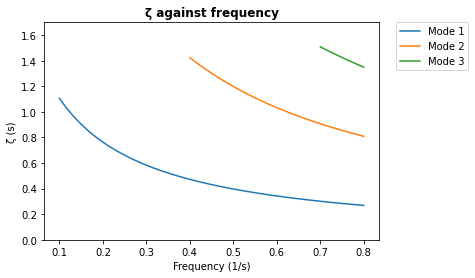

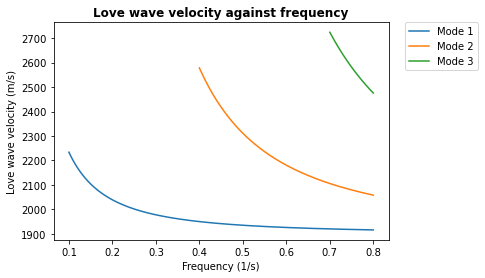

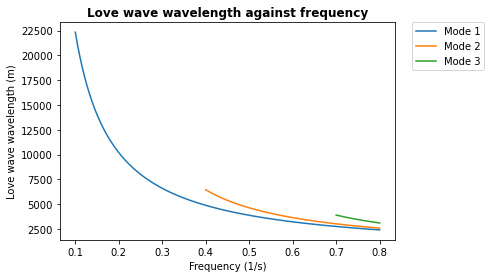

In [10]:
# set frequency range for each mode
range_freq_mode1 = np.linspace(0.1, 0.8, 800) 
range_freq_mode2 = np.linspace(0.4, 0.8, 500) 
range_freq_mode3 = np.linspace(0.7, 0.8, 200) 

# initiate an empty list for ζ, Love wave velocity and wavelength in each mode
z_mode1 = [] 
z_mode2 = []
z_mode3 = []
cl_mode1 = []
cl_mode2 = []
cl_mode3 = []
wave_mode1 = []
wave_mode2 = []
wave_mode3 = []

# set the initial guess for each mode
initial_guess_mode1 = 0.2
initial_guess_mode2 = 0.8
initial_guess_mode3 = 1.2

dx = 0.01 # set the step size

# begin loop for mode 1
for freq in range_freq_mode1:

    z_mode1.append(root_secant_modified(initial_guess_mode1,dx,f)[0]) # insert approximated ζ value into its list
    
    # calculate Love wave velocity
    cl = np.sqrt(((b1 ** -2) - (root_secant_modified(initial_guess_mode1,dx,f)[0] / H) ** 2) ** -1) 
    
    cl_mode1.append(cl) # insert calculated Love wave velocity into its list
    wave = cl / freq # calculate Love wave wavelength
    wave_mode1.append(wave) # insert calculated Love wave wavelength into its list
    
# begin loop for mode 2
for freq in range_freq_mode2:
    
    z_mode2.append(root_secant_modified(initial_guess_mode2,dx,f)[0]) # insert approximated ζ value into its list
    
    # calculate Love wave velocity
    cl = np.sqrt(((b1 ** -2) - (root_secant_modified(initial_guess_mode2,dx,f)[0] / H) ** 2) ** -1)
    
    cl_mode2.append(cl) # insert calculated Love wave velocity into its list
    wave = cl / freq # calculate Love wave wavelength
    wave_mode2.append(wave) # insert calculated Love wave wavelength into its list

# begin loop for mode 3
for freq in range_freq_mode3:
    
    z_mode3.append(root_secant_modified(initial_guess_mode3,dx,f)[0]) # insert approximated ζ value into its list
    
    # calculate Love wave velocity
    cl = np.sqrt(((b1 ** -2) - (root_secant_modified(initial_guess_mode3,dx,f)[0] / H) ** 2) ** -1)
    
    cl_mode3.append(cl) # insert calculated Love wave velocity into its list
    wave = cl / freq # calculate Love wave wavelength
    wave_mode3.append(wave) # insert calculated Love wave wavelength into its list

# plot ζ over frequency
plt.figure()
plt.plot(range_freq_mode1, z_mode1, label = 'Mode 1')
plt.plot(range_freq_mode2, z_mode2, label = 'Mode 2')
plt.plot(range_freq_mode3, z_mode3, label = 'Mode 3')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # set legend location
plt.title('ζ against frequency', fontweight ="bold") # set plot title
plt.xlabel('Frequency (1/s)') # set x-axis label
plt.ylabel('ζ (s)') # set x-axis label
plt.ylim([0, 1.7]); # set y-axis limits

# plot Love wave velocity over frequency
plt.figure()
plt.plot(range_freq_mode1, cl_mode1, label = 'Mode 1')
plt.plot(range_freq_mode2, cl_mode2, label = 'Mode 2')
plt.plot(range_freq_mode3, cl_mode3, label = 'Mode 3')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # set legend location
plt.title('Love wave velocity against frequency', fontweight ="bold") # set plot title
plt.xlabel('Frequency (1/s)') # set x-axis label
plt.ylabel('Love wave velocity (m/s)') # set y-axis label

# plot Love wave wavelength over frequency
plt.figure()
plt.plot(range_freq_mode1, wave_mode1, label = 'Mode 1')
plt.plot(range_freq_mode2, wave_mode2, label = 'Mode 2')
plt.plot(range_freq_mode3, wave_mode3, label = 'Mode 3')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # set legend location
plt.title('Love wave wavelength against frequency', fontweight ="bold") # set plot title
plt.xlabel('Frequency (1/s)') # set x-axis label
plt.ylabel('Love wave wavelength (m)'); # set y-axis label

From analyzing the results of these plots, as frequency increases the number of modes present for each plot increases too. Additionally, it can be noticed that **both love wave velocity cL and wavelength $ \lambda $ decrease as frequency increases**.  ζ also decreases as frequency increases.

## Conclusion

As illustrated in this lab, the **modified secant method** can be an effective way of solving for the roots or modes of functions without having to have an intitial guess close to or bracketing the root. For the example, in this lab, the Dispersion Equation for Love Waves in a 2-layer system (a single surface layer overlying an infinite half space layer) was used to demonstrate this and was successful in doing so. The initial guess for the modified secant function was chosen graphically and it should be noted that when making the intial guess that it is not allowed to be chosen on an asymptote otherwise the function will not work. Different frequencies modes were plotted against ζ, the love wave velocity cL and the wavelength $ \lambda $. It was apparent that there are a different number of modes at different frquencies. ζ, the love wave velocity cL and the wavelength $ \lambda $ all decrease as the frequency f increases. 

## References

1) Sharp, M. (2021) University of Calgary Teaching Assistant. Computational Methods for Geophysicists Winter. 2021


2) Karchewski, B. (2021) Topic 02 – Root Finding Algorithms – Lecture, University of Calgary https://d2l.ucalgary.ca/d2l/le/content/356381/Home


3) Pictures used in this lab can be found at their url's embedded in the code!